In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# function for plotting regression function between any two variables
def regressionplt(width, height, dataset, xcol, ycol):
    plt.figure(figsize=(width, height))
    sns.regplot(x = xcol, y = ycol, data = dataset, line_kws={'color':'red'})
    plt.ylim(0,)

In [4]:
inputFile = r'F:\Download1\Salary_Prediction.csv'
input_df = pd.read_csv(inputFile)

In [5]:
#number of rows and columns in the dataset
print(input_df.shape)


(111993, 12)


In [6]:
# describe data
input_df.describe

<bound method NDFrame.describe of         SalaryKey    Year  Gender   Age               Country  Population  \
0               1  1997.0       0  41.0               Belarus     1239930   
1               2  1996.0   other  41.0             Singapore     1603504   
2               3  2018.0   other  28.0                Norway     1298017   
3               4  2006.0   other  33.0                  Cuba      751903   
4               5  2010.0  female  46.0  United Arab Emirates       95389   
5               6  1991.0    male  60.0               Liberia       56080   
6               7  1982.0     NaN  71.0    State of Palestine     1205185   
7               8  2008.0    male  36.0                Israel       31419   
8               9  2015.0    male  43.0           South Sudan       85333   
9              10  2019.0  female  16.0                  Cuba     1325383   
10             11  1981.0    male  51.0            Kyrgyzstan     2362346   
11             12  1989.0   other  15.0   

In [7]:
# general statistics of input data
input_df.describe(include=['object', 'int64', 'float64', 'bool'])

,SalaryKey,Year,Gender,Age,Country,Population,Occupation,College Degree,Using Glasses,Color of Hairs,Height,Salary
count,111993.000000,111552.000000,104561,111499.000000,111993,1.119930e+05,111671,104623,111993.000000,104751,111993.000000,1.119930e+05
unique,NaN,NaN,5,NaN,160,NaN,1340,5,NaN,6,NaN,NaN
top,NaN,NaN,male,NaN,Switzerland,NaN,pipefitter,Bachelor,NaN,Black,NaN,NaN
freq,NaN,NaN,42758,NaN,2327,NaN,261,43172,NaN,42778,NaN,NaN
mean,55997.000000,1999.421274,NaN,37.345304,NaN,8.388538e+05,NaN,NaN,0.500531,NaN,175.220192,1.092138e+05
std,32329.738686,11.576382,NaN,16.036694,NaN,2.196879e+06,NaN,NaN,0.500002,NaN,19.913889,1.498024e+05
min,1.000000,1980.000000,NaN,14.000000,NaN,7.700000e+01,NaN,NaN,0.000000,NaN,94.000000,-5.696906e+03
25%,27999.000000,1989.000000,NaN,24.000000,NaN,7.273400e+04,NaN,NaN,0.000000,NaN,160.000000,3.077169e+04
50%,55997.000000,1999.000000,NaN,35.000000,NaN,5.060920e+05,NaN,NaN,1.000000,NaN,174.000000,5.733917e+04
75%,83995.000000,2009.000000,NaN,48.000000,NaN,1.184501e+06,NaN,NaN,1.000000,NaN,190.000000,1.260936e+05


In [8]:
# to check for nulls in each attribute
missing_instance = input_df.isnull().sum()
missing_instance

SalaryKey            0
Year               441
Gender            7432
Age                494
Country              0
Population           0
Occupation         322
College Degree    7370
Using Glasses        0
Color of Hairs    7242
Height               0
Salary               0
dtype: int64

In [9]:
#to identify distribution of values in categorical features
print(input_df.groupby('Gender').size().reset_index(name='counts'))
print(input_df.groupby('College Degree').size().reset_index(name='counts'))
print(input_df.groupby('Color of Hairs').size().reset_index(name='counts'))
print(input_df.groupby('Occupation').size().reset_index(name='counts'))
print(input_df.groupby('Country').size().reset_index(name='counts'))

    Gender  counts
0        0     724
1   female   27170
2     male   42758
3    other   27060
4  unknown    6849
  College Degree  counts
0              0     697
1       Bachelor   43172
2         Master   26941
3             No   26992
4            PhD    6821
  Color of Hairs  counts
0              0      29
1          Black   42778
2          Blond   27248
3          Brown   27208
4            Red    6833
5        Unknown     655
                          Occupation  counts
0                     .net developer       5
1            .net software developer       2
2                         Accountant      22
3                 Accounts Assistant      26
4                     Accounts Clerk      23
5                   Accounts Manager      30
6                     Accounts Staff      21
7                  Acoustic Engineer      32
8                              Actor      20
9                            Actress      22
10                           Actuary      22
11                   

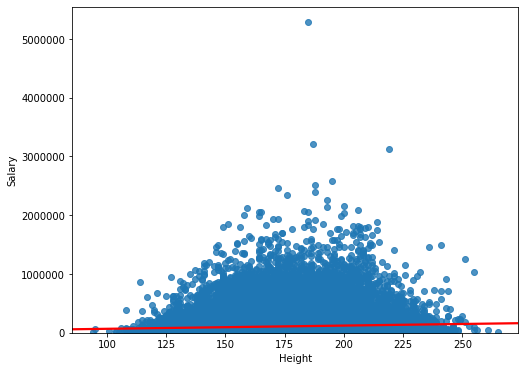

In [10]:
# checking for outliers by plotting a regression curve of salary with one low cardinal feature
regressionplt(8, 6, input_df, 'Height', 'Salary')

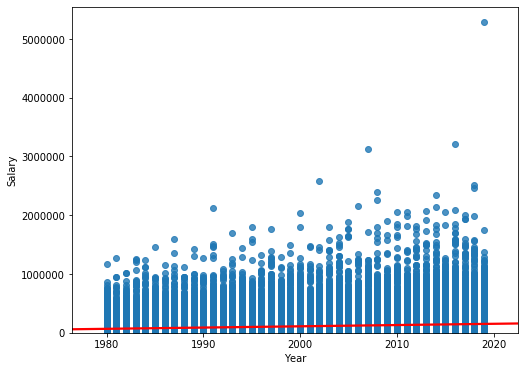

In [12]:
regressionplt(8, 6, input_df, 'Year', 'Salary')

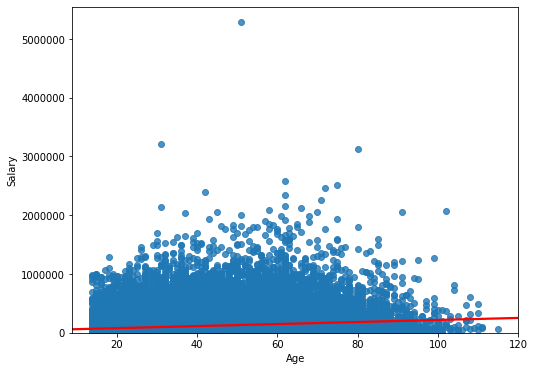

In [13]:
regressionplt(8, 6, input_df, 'Age', 'Salary')

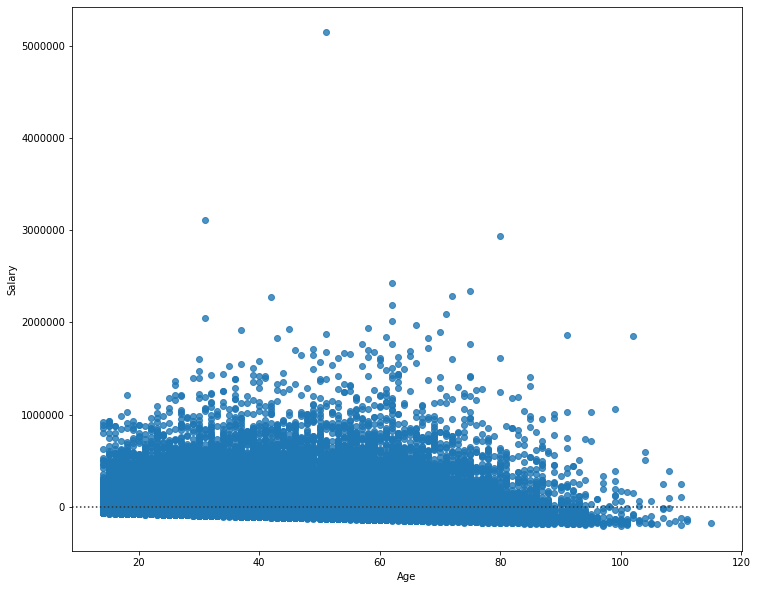

In [11]:
# residue plot for checking data spread
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(input_df['Age'], input_df['Salary'])
#plt.show()

In [6]:
#removal of outliers[salary cannot be negative]
input_df_Outlier_Removed = input_df[input_df['Salary'] > 0]
#input_df_Outlier_Removed = input_df_Outlier_Removed[input_df_Outlier_Removed['Age'] < 90]
input_df_Outlier_Removed = input_df_Outlier_Removed[input_df_Outlier_Removed['Salary'] < 3000000]

In [32]:
#regressionplt(8, 6, input_df_Outlier_Removed, 'Height', 'Salary')

,SalaryKey,Year,Age,Population,Using Glasses,Height,Salary
SalaryKey,1.000000,-0.001709,0.000552,-0.003722,0.000958,-0.001455,0.002447
Year,-0.001709,1.000000,-0.002137,0.003650,-0.002256,0.002500,0.166064
Age,0.000552,-0.002137,1.000000,0.004841,-0.000500,-0.001869,0.186496
Population,-0.003722,0.003650,0.004841,1.000000,0.000675,-0.002164,0.014875
Using Glasses,0.000958,-0.002256,-0.000500,0.000675,1.000000,0.007068,0.005774
Height,-0.001455,0.002500,-0.001869,-0.002164,0.007068,1.000000,0.072200
Salary,0.002447,0.166064,0.186496,0.014875,0.005774,0.072200,1.000000


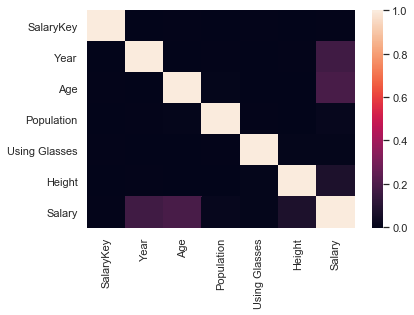

In [28]:
# checking coorelation
corr = input_df_Outlier_Removed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
input_df_Outlier_Removed.corr()


In [7]:
#ignoring population as it is has low corelation.
selected_training_columns = ['Year',
                             'Age',
                             'Gender',
                             'Country',
                             #'Population',
                             'College Degree',
                             'Using Glasses',
                             'Color of Hairs',
                             'Occupation',
                             'Height',
                             'Salary'
                             ]

In [8]:
dataset = input_df_Outlier_Removed[selected_training_columns]

In [9]:
# Data Cleaning

# Inputing Gender column
dataset['Gender'].replace('0', 'Unknown', inplace=True)
dataset['Gender'].replace('other', 'Unknown', inplace=True)
dataset['Gender'].replace('unknown', 'Unknown', inplace=True)
dataset['Gender'].replace(np.nan, 'Unknown', inplace=True)


dataset['Color of Hairs'].replace('0', 'Unknown', inplace=True)
dataset['Color of Hairs'].replace('Unknown', 'Unknown', inplace=True)
dataset['Color of Hairs'].replace(np.nan, 'Unknown', inplace=True)


print(dataset.groupby('Gender').size().reset_index(name='counts'))
print(dataset.groupby('Color of Hairs').size().reset_index(name='counts'))



C:\Users\Manik325\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


    Gender  counts
0  Unknown   42010
1   female   27078
2     male   42736
  Color of Hairs  counts
0          Black   42717
1          Blond   27207
2          Brown   27164
3            Red    6823
4        Unknown    7913


In [9]:
# command to remove 494 nulls value from age
dataset = dataset[dataset['Age'].notna()]
dataset = dataset[dataset['Year'].notna()]
dataset.isnull().sum()

Year                 0
Age                  0
Gender               0
Country              0
College Degree    7284
Using Glasses        0
Color of Hairs       0
Occupation         321
Height               0
Salary               0
dtype: int64

In [11]:
dataset['Occupation'].replace(np.nan, 'Unknown', inplace=True)
dataset['College Degree'].replace(np.nan, 'Unknown', inplace=True)

#check for null
dataset.isnull().sum()

Year              0
Age               0
Gender            0
Country           0
College Degree    0
Using Glasses     0
Color of Hairs    0
Occupation        0
Height            0
Salary            0
dtype: int64

In [12]:
# seperating dependant and independent parts of the dataset
y = dataset['Salary']
dataset.drop('Salary', axis=1, inplace=True)
x_dataset = dataset.copy()

C:\Users\Manik325\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
# Encoding categorical features
# Ref: https://www.datacamp.com/community/tutorials/categorical-data
# Ref: http://thedataist.com/when-categorical-data-goes-wrong/

from feature_engine.categorical_encoders import OneHotCategoricalEncoder

columns_to_encode = ['Gender', 'Country', 'Color of Hairs', 'College Degree', 'Occupation']

encoder = OneHotCategoricalEncoder(top_categories=None,
variables=columns_to_encode,  # we can select which variables to encode
drop_last=True)

encoder.fit(x_dataset)
encoded_dataet = encoder.transform(x_dataset)

In [14]:
# Splitting data into training and testing subset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_dataet, y, test_size=0.2, random_state=0)

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(89459, 1512)
(89459,)
(22365, 1512)
(22365,)


In [86]:
# Linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
# Running pediction
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
# Evaluating Model performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 42887.0648449759
Mean Squared Error: 6563257811.378272
Root Mean Squared Error: 81013.93590844894


In [15]:
#graphical representation of the model performance
from sklearn import metrics
def plot_prediction(y_test, y_pred):
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df1 = df.head(25)
    df1.plot(kind='bar', figsize=(10, 8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    # Calculate mean absolute percentage error (MAPE)
    errors = abs(y_pred - y_test)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

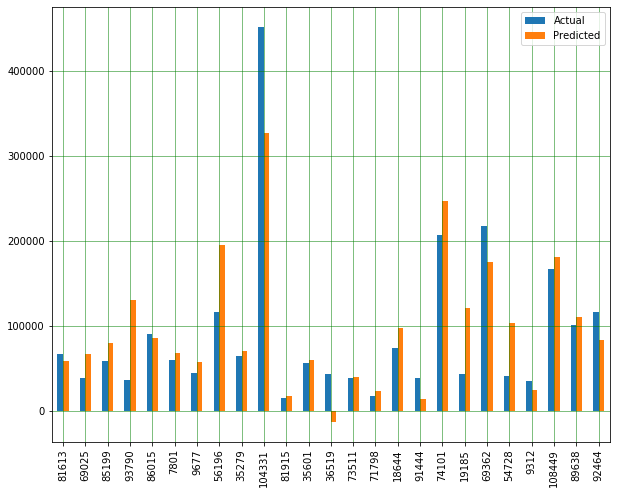

Mean Absolute Error: 42887.0648449759
Mean Squared Error: 6563257811.378272
Root Mean Squared Error: 81013.93590844894
Accuracy: 9.52 %.


In [19]:
plot_prediction(y_test, y_pred)

In [10]:
# Alternate data imputation strategy
age_median = dataset['Age'].median()
dataset['Age'].replace(np.nan, age_median, inplace=True)
dataset['Age'] = (dataset['Age'] * dataset['Age']) ** (0.5)

year_median = dataset['Year'].median()
dataset['Year'].replace(np.nan, year_median, inplace=True)

C:\Users\Manik325\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [87]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

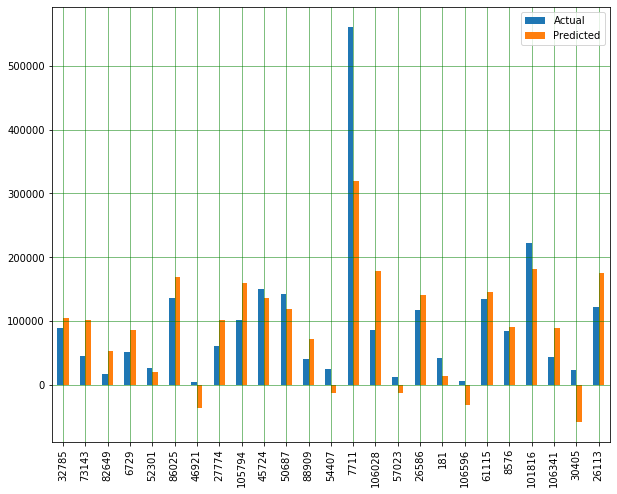

Mean Absolute Error: 42473.668677019195
Mean Squared Error: 6148159676.557089
Root Mean Squared Error: 78410.20135516225
Accuracy: -13.02 %.


In [88]:
plot_prediction(y_test, y_pred)

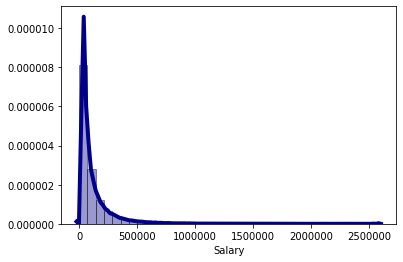

In [42]:
# Plotting density curve to see if the values are skewed
df = pd.DataFrame({'Salary': y})
sns.distplot(df['Salary'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [89]:
# Map y to log scale handle skewed value in training
y_train_log = np.log(y_train)

In [90]:
# retraining the regressor model
model.fit(X_train, y_train_log)
y_pred = np.exp(model.predict(X_test)) #Taking inverse log of the predicted values

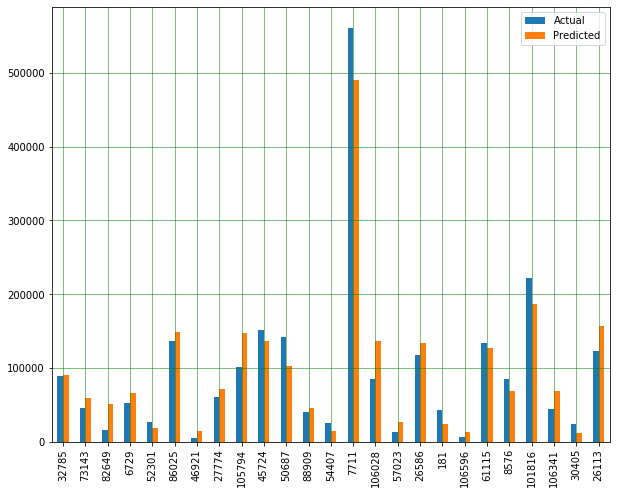

Mean Absolute Error: 26026.16864507491
Mean Squared Error: 3058501958.6966205
Root Mean Squared Error: 55303.72463674233
Accuracy: 55.73 %.


In [91]:
plot_prediction(y_test, y_pred)

In [ ]:
####......Much Better......####

In [ ]:
# Trying other regressor models
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, training_scores_encoded)
y_pred = logisticRegr.predict(X_test)
plot_prediction(y_test, y_pred)

C:\Users\Manik325\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manik325\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


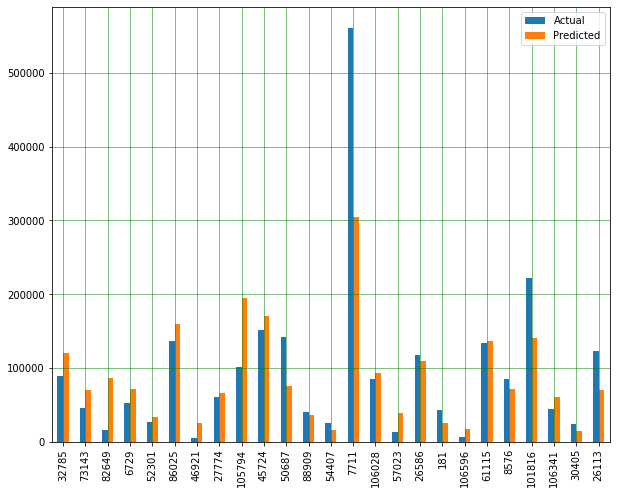

Mean Absolute Error: 36754.26070846787
Mean Squared Error: 6569201671.137251
Root Mean Squared Error: 81050.61178755686
Accuracy: 34.94 %.


In [16]:
# TODO Try other encoding methods and complex models
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 5, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_prediction(y_test, y_pred)

In [ ]:
# TODO Try other encoding methods and complex models
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_prediction(y_test, y_pred)

In [17]:
pip install catboost

  Stored in directory: C:\Users\Manik325\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


Learning rate set to 0.086854
0:	learn: 147755.6022404	total: 25.4ms	remaining: 25.4s
1:	learn: 146836.3694614	total: 49.9ms	remaining: 24.9s
2:	learn: 146045.2763440	total: 73.7ms	remaining: 24.5s
3:	learn: 145319.5804359	total: 97.5ms	remaining: 24.3s
4:	learn: 144600.0584209	total: 127ms	remaining: 25.3s
5:	learn: 143934.3602799	total: 154ms	remaining: 25.6s
6:	learn: 143269.7186129	total: 187ms	remaining: 26.5s
7:	learn: 142639.0484205	total: 221ms	remaining: 27.4s
8:	learn: 142068.0753416	total: 254ms	remaining: 28s
9:	learn: 141541.2236845	total: 278ms	remaining: 27.5s
10:	learn: 141038.6052200	total: 301ms	remaining: 27.1s
11:	learn: 140508.4866816	total: 325ms	remaining: 26.8s
12:	learn: 139974.3802910	total: 349ms	remaining: 26.5s
13:	learn: 139478.8432512	total: 375ms	remaining: 26.4s
14:	learn: 138987.1944815	total: 399ms	remaining: 26.2s
15:	learn: 138517.8155158	total: 430ms	remaining: 26.5s
16:	learn: 138037.7505161	total: 461ms	remaining: 26.6s
17:	learn: 137566.5273710	

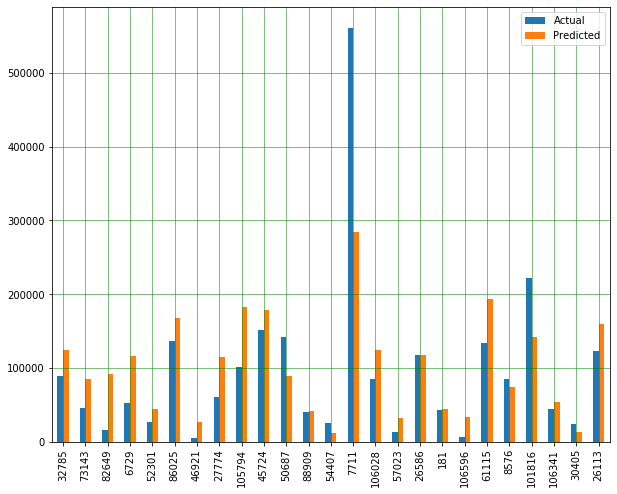

Mean Absolute Error: 36488.30160903748
Mean Squared Error: 5527423002.764146
Root Mean Squared Error: 74346.64083039762
Accuracy: 32.51 %.


In [19]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_prediction(y_test, y_pred)

0:	learn: 1.0938876	total: 26.5ms	remaining: 4m 25s
1:	learn: 1.0887313	total: 50.8ms	remaining: 4m 13s
2:	learn: 1.0838684	total: 76.5ms	remaining: 4m 14s
3:	learn: 1.0793066	total: 101ms	remaining: 4m 12s
4:	learn: 1.0748848	total: 125ms	remaining: 4m 10s
5:	learn: 1.0705209	total: 149ms	remaining: 4m 8s
6:	learn: 1.0662758	total: 173ms	remaining: 4m 7s
7:	learn: 1.0622325	total: 198ms	remaining: 4m 6s
8:	learn: 1.0582547	total: 228ms	remaining: 4m 13s
9:	learn: 1.0545404	total: 266ms	remaining: 4m 25s
10:	learn: 1.0508703	total: 298ms	remaining: 4m 30s
11:	learn: 1.0472970	total: 326ms	remaining: 4m 31s
12:	learn: 1.0437779	total: 358ms	remaining: 4m 35s
13:	learn: 1.0404325	total: 389ms	remaining: 4m 37s
14:	learn: 1.0370897	total: 417ms	remaining: 4m 37s
15:	learn: 1.0338641	total: 447ms	remaining: 4m 38s
16:	learn: 1.0306792	total: 471ms	remaining: 4m 36s
17:	learn: 1.0275442	total: 496ms	remaining: 4m 35s
18:	learn: 1.0245373	total: 520ms	remaining: 4m 33s
19:	learn: 1.0214552	t

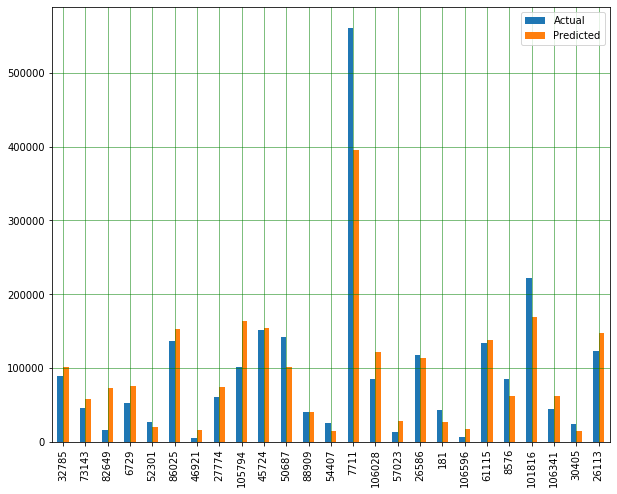

Mean Absolute Error: 28164.715334946268
Mean Squared Error: 4187554377.991738
Root Mean Squared Error: 64711.31568737989
Accuracy: 53.97 %.


In [26]:
model = CatBoostRegressor(iterations=10000,
                          learning_rate=0.03,
                          depth=6)
y_train_log = np.log(y_train)
model.fit(X_train, y_train_log)
y_pred = np.exp(model.predict(X_test))
plot_prediction(y_test, y_pred)